# **Environment Setup**

First we need to install all this environment

Exercise 1: !pip install pandas

Exercise 2: !pip install numpy

Exercise 3: !pip install matplotlib

Exercise 4: !pip install scikit-learn

Exercise 5: !pip install tensorflow

Exercise 6: !pip install opencv-python


#**Exercise 1**

Initially we will start with open image file and shwing it using cv2


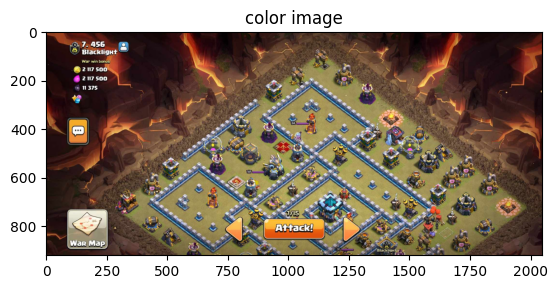

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/Image_1.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title('color image')
plt.show()

#**Exercise 2**
**Opening the image files in grey scale**

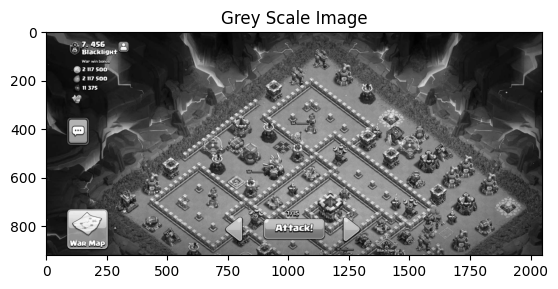

In [ ]:
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title('Grey Scale Image')
plt.show()

#**Exercise 3**
**To save the image in grey scale we can use this:**

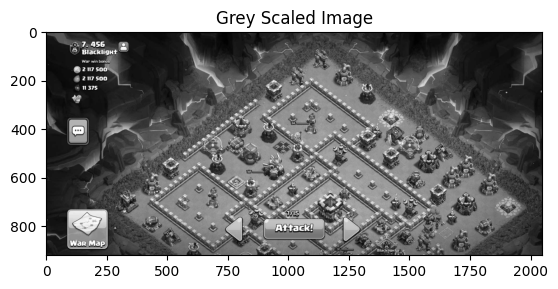

In [ ]:
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title('Grey Scaled Image')
plt.savefig('grey_scale.jpeg')
plt.show()

#**Exercise 4**
**To get the image resolution we can use**

In [ ]:
print(image.shape)

(921, 2048)


#**Exercise 5**
**Croping a part of the image we can use the same slicing method for python array as follows:**

Here is the note: Corpped part is determined using the this part of image

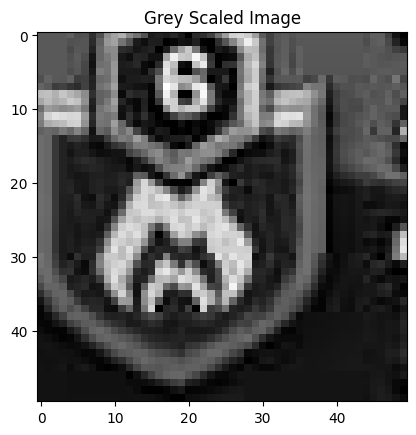

In [ ]:
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = image[50:100, 100:150]
plt.imshow(image, cmap='gray')
plt.title('Grey Scaled Image')
plt.show()

#**Exercise 6**
**Plot a histogram for the grey scale image**

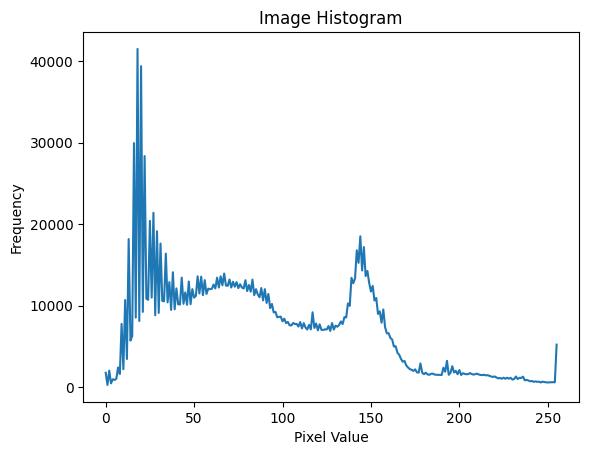

In [ ]:
# Calculate histogram using OpenCV
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.plot(hist)
plt.title('Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

#**Exercise 7**
**To work on image we can use commonly used libaries such as karas we can use to built in tools to do so.**

In [ ]:
import keras
from tensorflow.keras.utils import load_img

#load the image
img = load_img(image_path)

# find more about the image
print(type(img))
print(img.format)
print(img.mode)
print(img.size)

#show the image
img.show()

<class 'PIL.JpegImagePlugin.JpegImageFile'>
JPEG
RGB
(2048, 921)


#**Exercise 8**
In this part we will be developing an image classifer using karas. To do so we need to used a special type of nerual networks called Convolution Netural Networks(CNN).

**Starting by importing the libaries:**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from keras.datasets import mnist


#**Exercise 9**
**Load the datset and split it intro train and test**

Note: Make sure that you should download the mnist.npz other wise the code won't run.

In [ ]:
# Load the MNIST dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Reshape the images and normalize pixel values to be between 0 and 1
X_train = X_train.reshape(-1, 28, 28, 1).astype('float64') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float64') / 255.0

11490434/11490434 [==============================] - 0s 0us/step


#**Exercise 10**
**Visualise an example of the image and their labels**

---



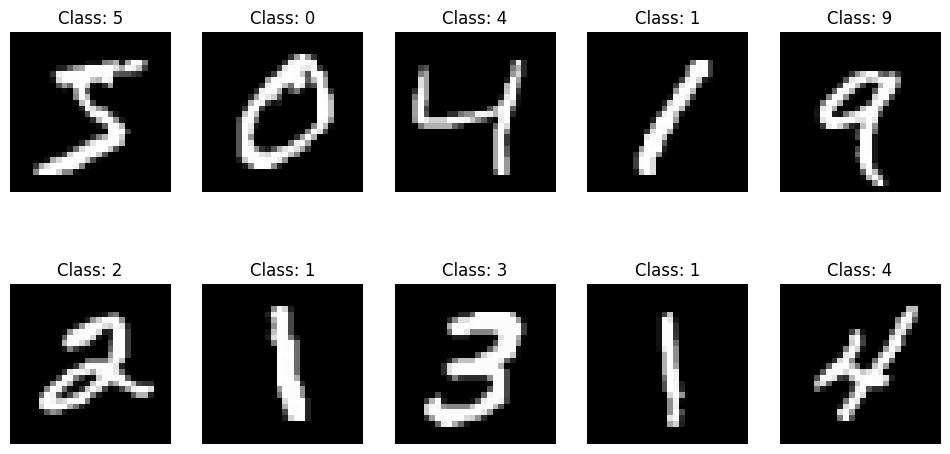

In [ ]:
# Load the MNIST data from 'mnist.npz'
data = np.load('/content/mnist.npz')
X_train = data['x_train']
y_train = data['y_train']
X_test = data['x_test']
y_test = data['y_test']
class_names = [str(i) for i in range(10)]  # Assuming class names are digits 0-9

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Display images and corresponding class names
num_rows, num_cols = 2, 5  # Display 2 rows and 5 columns of images
plt.figure(figsize=(12, 6))

for i in range(num_rows * num_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Class: {class_names[np.argmax(y_train[i])]}')
    plt.axis('off')

plt.show()

#**Exercise 11**
**Model will use for the classification is made up of few layers. The main layers a re Conv2D and Maxpoling2D**

To implement the model, we can use:

In [ ]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',
metrics=['accuracy'])


#**Exercise 12**
**Train the model, please be patience it will take little time to train model**

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
938/938 [==============================] - 62s 65ms/step - loss: 0.2807 - accuracy: 0.9384 - val_loss: 0.0548 - val_accuracy: 0.9827
Epoch 2/5
938/938 [==============================] - 63s 67ms/step - loss: 0.0602 - accuracy: 0.9815 - val_loss: 0.0486 - val_accuracy: 0.9868
Epoch 3/5
938/938 [==============================] - 57s 60ms/step - loss: 0.0429 - accuracy: 0.9869 - val_loss: 0.0524 - val_accuracy: 0.9848
Epoch 4/5
938/938 [==============================] - 58s 61ms/step - loss: 0.0370 - accuracy: 0.9883 - val_loss: 0.0491 - val_accuracy: 0.9863
Epoch 5/5
938/938 [==============================] - 59s 63ms/step - loss: 0.0336 - accuracy: 0.9895 - val_loss: 0.0408 - val_accuracy: 0.9888


#**Exercise 13**
**Finally Evaluate its performance**

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy *100:.2f}%')

313/313 [==============================] - 3s 9ms/step - loss: 0.0450 - accuracy: 0.9875
Test Accuracy: 98.75%


#**Exercise 14**
**To check an eample of correclty classified and misclassified images, we can search for the labels of the predictions and compare it to the labels of the dataset.**

In [ ]:
# Predictions on the test set
predictions = model.predict(X_test)
# Find indices of correctly and incorrectly classified images
correct_indices = np.where(np.argmax(predictions, axis=1) == np.argmax(y_test,
axis=1))[0]
incorrect_indices = np.where(np.argmax(predictions, axis=1) !=
np.argmax(y_test, axis=1))[0]


313/313 [==============================] - 3s 8ms/step


And also we cal Visualise them using this code:

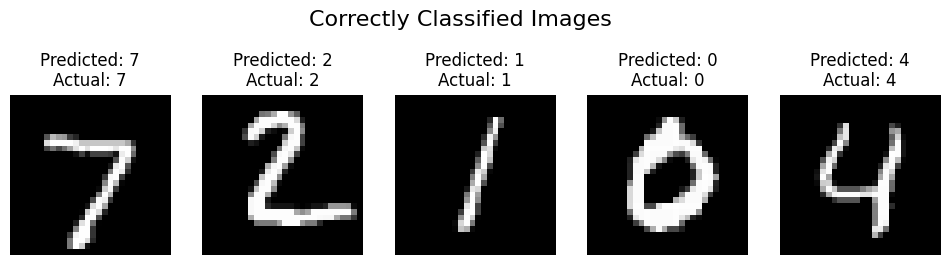

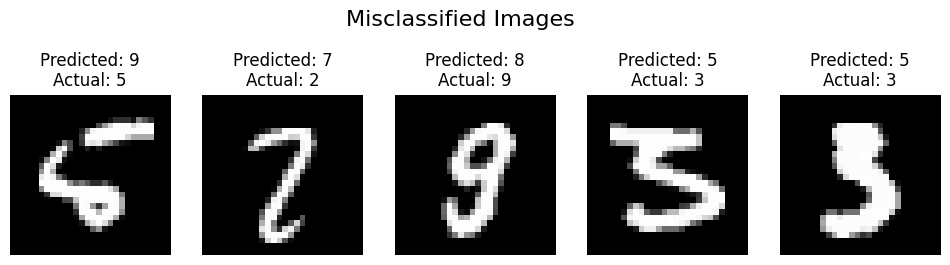

In [ ]:
# Display examples of correctly classified images

plt.figure(figsize=(12, 6))
plt.suptitle('Correctly Classified Images', fontsize=16)

for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[correct_indices[i]].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {np.argmax(predictions[correct_indices[i]])}\nActual: {np.argmax(y_test[correct_indices[i]])}')
    plt.axis('off')

#Display examples of misclassified images
plt.figure(figsize =(12, 6))
plt.suptitle('Misclassified Images', fontsize = 16)

for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[incorrect_indices[i]].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {np.argmax(predictions[incorrect_indices[i]])}\nActual: {np.argmax(y_test[incorrect_indices[i]])}')
    plt.axis('off')

plt.show()
